Import libraries
---------------

In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import numpy as np
import csv
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline

Draw map
--------

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=119.7,21.7,122.3,25.5&bboxSR=3821&imageSR=3821&size=1000,1461&dpi=96&format=png32&f=image


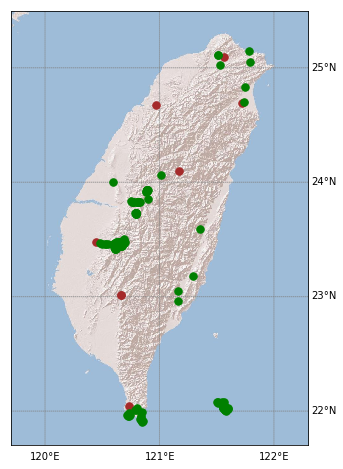

In [6]:
# create figure
plt.figure(figsize=(6,8))

# create map
m = Basemap(resolution='i', # c, l, i, h, f or None
            projection='tmerc',
            epsg=3821,
            area_thresh=0.,
            llcrnrlon=119.7, llcrnrlat= 21.7, urcrnrlon=122.3, urcrnrlat=25.5)
m.drawparallels(np.arange(-90.,91.,1.),labels=[False,True,True,False],color='grey')
m.drawmeridians(np.arange(-180.,181.,1.),labels=[True,False,False,True],color='grey')
m.arcgisimage(service='World_Shaded_Relief', xpixels = 1000, verbose= True)
# http://server.arcgisonline.com/arcgis/rest/services

# Read 2013-2015 markers from csv list
surveylocdata = pd.read_csv("Taiwan_20132015_species_occurence.csv", header=0)
# and group by species name
surveysplocdata = surveylocdata.groupby('Species', sort=0)

# Species to make a map for
Species = 'Bactrocera dorsalis'

# plot survey points
Surv_y = list(surveysplocdata.get_group(Species)['Lat'])
Surv_x = list(surveysplocdata.get_group(Species)['Long'])
m.plot(Surv_x, Surv_y, marker='.', color='green', alpha=1, markersize=15, linestyle='None', latlon=True, zorder=25)

# Read historical markers from csv list
histlocdata = pd.read_csv("Taiwan_historical_species_occurence.csv", header=0)
# and group by species name
histsplocdata = histlocdata.groupby('Species', sort=0)

# plot historical points
Hist_y = list(histsplocdata.get_group(Species)['Lat'])
Hist_x = list(histsplocdata.get_group(Species)['Long'])
m.plot(Hist_x, Hist_y, marker='.', color='brown', alpha=1, markersize=15, linestyle='None', latlon=True, zorder=24)

# plt.show()

plt.savefig((Species+'.png'), dpi=300, bbox_inches="tight")
# plt.savefig('outfilename.pdf', format='pdf', bbox_inches=None)